<a href="https://colab.research.google.com/github/UdayShankar8/S8/blob/master/EVA4_S8_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team :
krishnateja.k2@gmail.com
amar.r.naik@gmail.com
shankar.uday007@gmail.com
prasad.shripathi@gmail.com

# 1. Import Libraries

In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
import sys
import matplotlib.pyplot as plt
import numpy as np
import random
# from torch_receptive_field import PytorchReceptiveField

!pip install torchsummary

# from receptivefield.image import get_default_image
# from torch_receptive_field import receptive_field

# 2. Mount Google Drive to get the files individual files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!rm -rf '/content/drive/My Drive/Colab Notebooks/S8/__pycache__'
!ls -lrt '/content/drive/My Drive/Colab Notebooks/S8'

total 2197
-rw------- 1 root root    2488 Mar 10 17:18 testModel.py
-rw------- 1 root root    4771 Mar 10 17:18 dataTorchTransformLoad.py
-rw------- 1 root root    3807 Mar 10 17:18 trainModel.py
-rw------- 1 root root   42849 Mar 10 17:19 S8.ipynb
-rw------- 1 root root 2191380 Mar 10 17:19 EVA4_S8_CIFAR10.ipynb
-rw------- 1 root root    2700 Mar 10 18:59 customDeepCNN.py


## 2.1 Add Googledrive path to the systempath  

In [0]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/S8/')

# 3. Import custom functions and classes

 1. dataTorchTransformLoad
 2. customDeepCNN
 3. trainModel (params for regularization and misclassification plots)
 4. testModel (params for regularization and misclassification plots)


In [0]:
import dataTorchTransformLoad as dtl
import customDeepCNN as deep_cnn
import trainModel
import testModel

In [0]:
# !cat '/content/drive/My Drive/Colab Notebooks/S8/testModel.py'

# 4. Train - Test Data Load with torch transforms

In [15]:
train,test,train_loader,test_loader = dtl.data_transform_and_load_function('CIFAR10',64)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


## 4.1 Data Statistics

In [16]:
train_transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=train_transform)
    #print(vars(train_set))
print("Shape : ", train_set.data.shape)
print("Mean : ",train_set.data.mean(axis=(0,1,2))/255)
print("Std : ",train_set.data.std(axis=(0,1,2))/255)
print("Min : ",train_set.data.min(axis=(0,1,2))/255)
print("Max : ",train_set.data.max(axis=(0,1,2))/255)

Files already downloaded and verified
Shape :  (50000, 32, 32, 3)
Mean :  [0.49139968 0.48215841 0.44653091]
Std :  [0.24703223 0.24348513 0.26158784]
Min :  [0. 0. 0.]
Max :  [1. 1. 1.]


## 4.2 Display data

[['plane' 'dog' 'deer' 'deer' 'truck' 'cat' 'truck' 'truck']
 ['cat' 'cat' 'plane' 'horse' 'plane' 'dog' 'dog' 'deer']
 ['car' 'car' 'frog' 'car' 'frog' 'dog' 'ship' 'cat']
 ['car' 'frog' 'deer' 'bird' 'deer' 'bird' 'cat' 'horse']
 ['car' 'cat' 'cat' 'ship' 'horse' 'plane' 'plane' 'plane']
 ['truck' 'plane' 'frog' 'horse' 'ship' 'deer' 'bird' 'plane']
 ['cat' 'dog' 'bird' 'truck' 'dog' 'cat' 'deer' 'dog']
 ['dog' 'frog' 'horse' 'frog' 'ship' 'deer' 'plane' 'truck']]


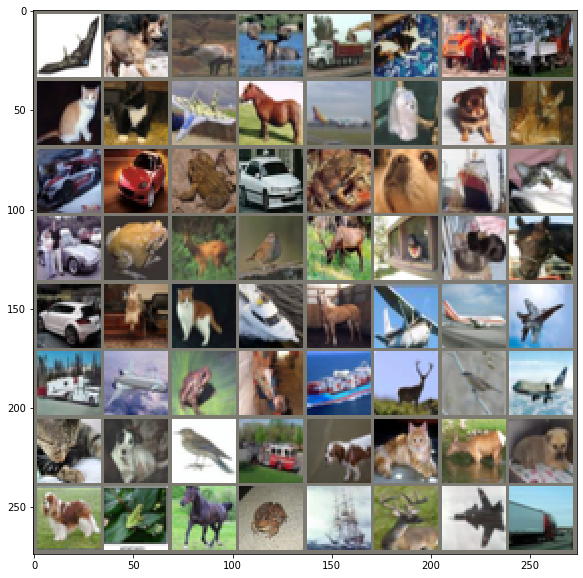

In [17]:
# functions to show an image
def imageshow(img):
    # img = img / 2 + 0.5      #unnormalize
    img[0] = img[0]*0.24703223 + 0.49139968
    img[1] = img[1]*0.24348513 + 0.48215841
    img[2] = img[2]*0.26158784 + 0.44653091
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

random.seed(1)
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
random.seed(1)
imageshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(64)))
print(np.array([classes[labels[j]] for j in range(64)]).reshape(8,8))

# 5. Load Model and print ModelSummary

In [21]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = deep_cnn.ResNet18().to(device)
# model = Net(3).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

/content/drive/My Drive/Colab Notebooks/S8/customDeepCNN.py:61: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


# 6. Run Models

## 6.1 Normal Run - No Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/S8/customDeepCNN.py:61: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=2.742418050765991 Batch_id=0 Accuracy=10.94:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/S8/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=0.6149436235427856 Batch_id=781 Accuracy=53.33: 100%|██████████| 782/782 [00:32<00:00, 23.85it/s]
/content/drive/My Drive/Colab Notebooks/S8/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad


Test set: Average loss: 1.0163, Accuracy: 6408/10000 (64.08%)

EPOCH: 1


Loss=0.8814586997032166 Batch_id=781 Accuracy=72.83: 100%|██████████| 782/782 [00:32<00:00, 23.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7151, Accuracy: 7520/10000 (75.20%)

EPOCH: 2


Loss=0.4969414472579956 Batch_id=781 Accuracy=79.77: 100%|██████████| 782/782 [00:32<00:00, 23.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6140, Accuracy: 7907/10000 (79.07%)

EPOCH: 3


Loss=0.27338069677352905 Batch_id=781 Accuracy=83.66: 100%|██████████| 782/782 [00:32<00:00, 23.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5448, Accuracy: 8129/10000 (81.29%)

EPOCH: 4


Loss=0.9567693471908569 Batch_id=781 Accuracy=86.51: 100%|██████████| 782/782 [00:32<00:00, 24.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5323, Accuracy: 8240/10000 (82.40%)

EPOCH: 5


Loss=0.9694802761077881 Batch_id=781 Accuracy=88.61: 100%|██████████| 782/782 [00:32<00:00, 23.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4942, Accuracy: 8342/10000 (83.42%)

EPOCH: 6


Loss=0.19411538541316986 Batch_id=781 Accuracy=90.46: 100%|██████████| 782/782 [00:32<00:00, 23.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4791, Accuracy: 8454/10000 (84.54%)

EPOCH: 7


Loss=0.23932433128356934 Batch_id=781 Accuracy=95.44: 100%|██████████| 782/782 [00:32<00:00, 23.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3650, Accuracy: 8802/10000 (88.02%)

EPOCH: 8


Loss=0.31362786889076233 Batch_id=781 Accuracy=96.73: 100%|██████████| 782/782 [00:32<00:00, 24.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3644, Accuracy: 8849/10000 (88.49%)

EPOCH: 9


Loss=0.3257833421230316 Batch_id=781 Accuracy=97.41: 100%|██████████| 782/782 [00:32<00:00, 23.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3740, Accuracy: 8840/10000 (88.40%)

EPOCH: 10


Loss=0.18556448817253113 Batch_id=781 Accuracy=97.85: 100%|██████████| 782/782 [00:32<00:00, 23.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3824, Accuracy: 8845/10000 (88.45%)

EPOCH: 11


Loss=0.10196524858474731 Batch_id=781 Accuracy=98.30: 100%|██████████| 782/782 [00:32<00:00, 23.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3855, Accuracy: 8852/10000 (88.52%)

EPOCH: 12


Loss=0.00692516565322876 Batch_id=781 Accuracy=98.78: 100%|██████████| 782/782 [00:32<00:00, 23.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3859, Accuracy: 8847/10000 (88.47%)

EPOCH: 13


Loss=0.014756560325622559 Batch_id=781 Accuracy=98.92: 100%|██████████| 782/782 [00:32<00:00, 24.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3849, Accuracy: 8846/10000 (88.46%)

EPOCH: 14


Loss=0.03098505735397339 Batch_id=781 Accuracy=98.91: 100%|██████████| 782/782 [00:32<00:00, 23.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3897, Accuracy: 8867/10000 (88.67%)

EPOCH: 15


Loss=0.17607837915420532 Batch_id=781 Accuracy=98.99: 100%|██████████| 782/782 [00:32<00:00, 24.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3880, Accuracy: 8859/10000 (88.59%)

EPOCH: 16


Loss=0.0518280565738678 Batch_id=781 Accuracy=98.93: 100%|██████████| 782/782 [00:32<00:00, 23.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3904, Accuracy: 8861/10000 (88.61%)

EPOCH: 17


Loss=0.05139008164405823 Batch_id=781 Accuracy=98.94: 100%|██████████| 782/782 [00:32<00:00, 23.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3890, Accuracy: 8852/10000 (88.52%)

EPOCH: 18


Loss=0.06203049421310425 Batch_id=781 Accuracy=98.91: 100%|██████████| 782/782 [00:32<00:00, 24.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3901, Accuracy: 8844/10000 (88.44%)

EPOCH: 19


Loss=0.029046177864074707 Batch_id=781 Accuracy=98.98: 100%|██████████| 782/782 [00:32<00:00, 23.87it/s]



Test set: Average loss: 0.3882, Accuracy: 8846/10000 (88.46%)



Text(0.5, 1.0, 'Test Accuracy')

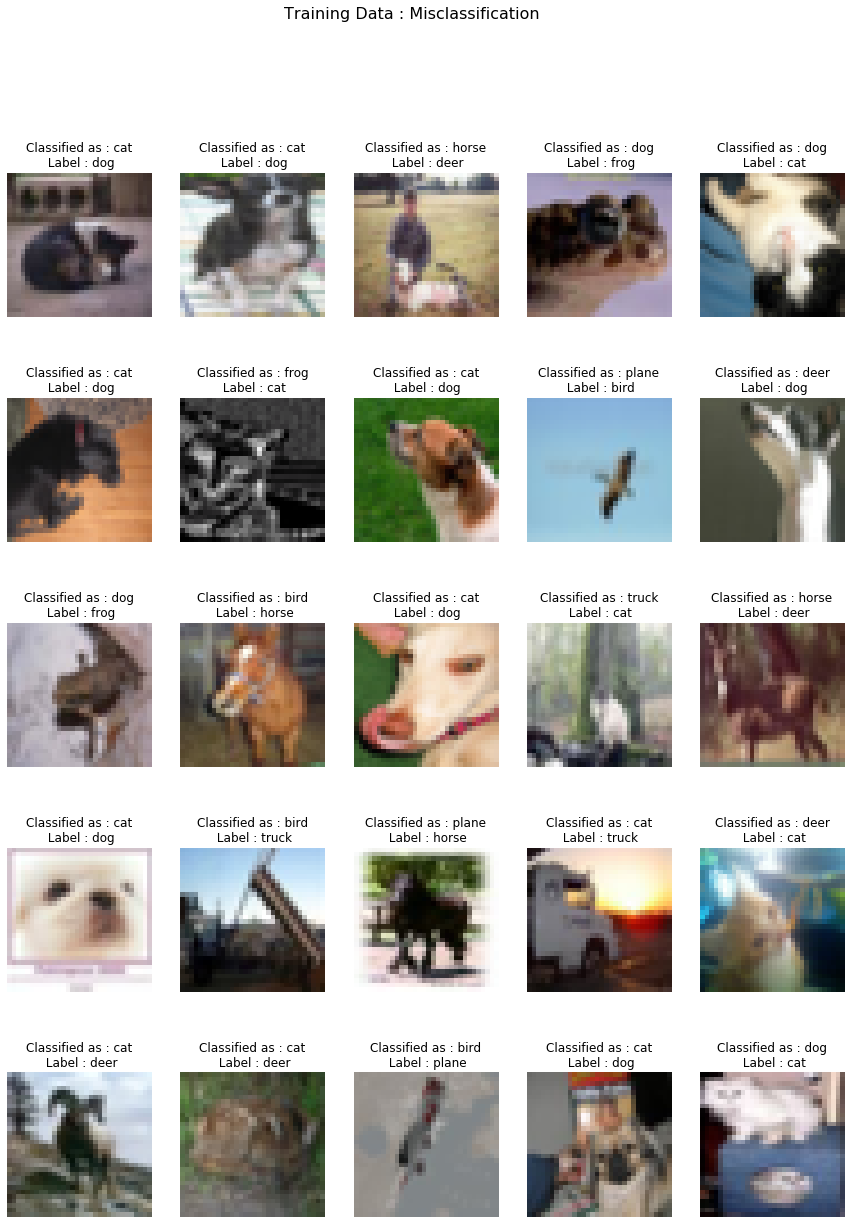

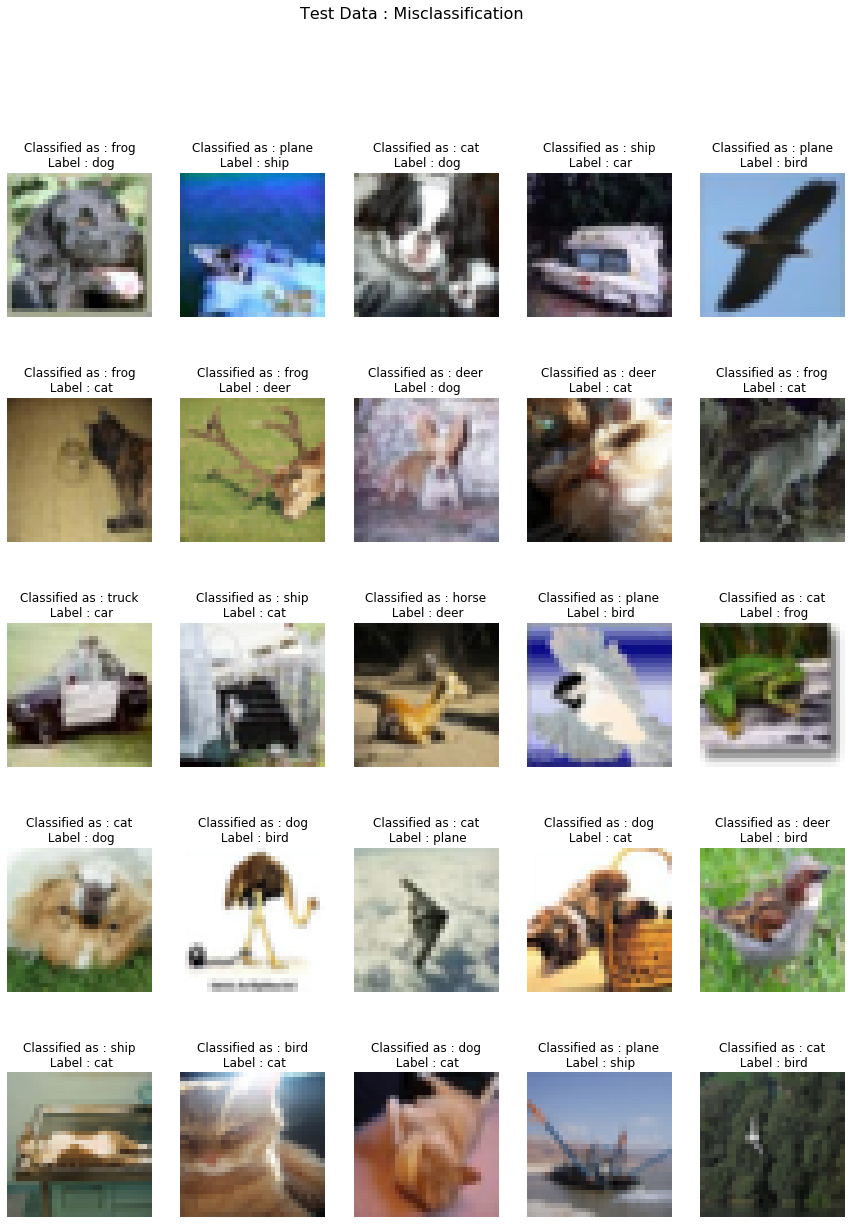

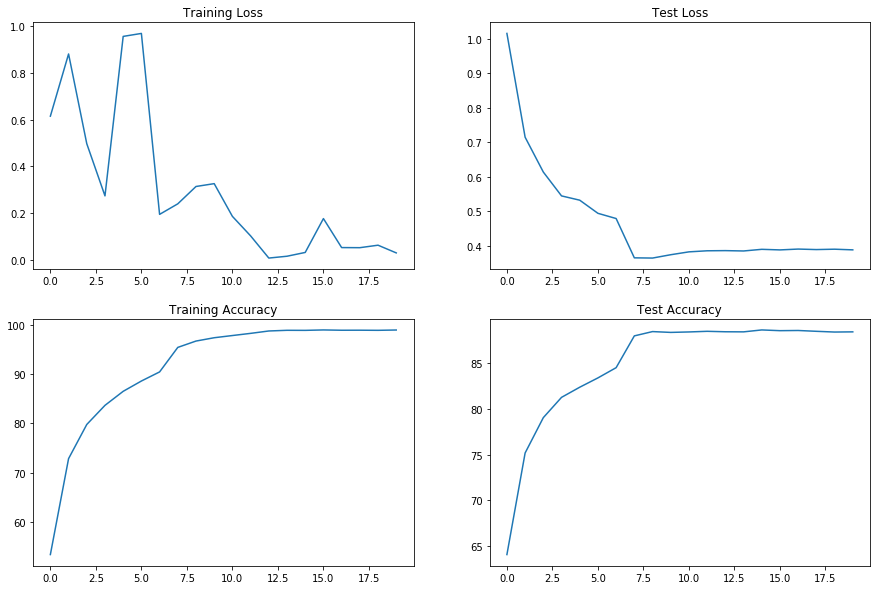

In [22]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = deep_cnn.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses = []
train_acc = []
test_losses = []
test_acc = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'Normal', True, EPOCHS-1)
    train_losses.append(tr_losses)
    train_acc.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'Normal',True, EPOCHS-1)
    test_losses.append(ts_loss)
    test_acc.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

## 6.2 Model with - L1 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/S8/customDeepCNN.py:61: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=57.30039596557617 Batch_id=0 Accuracy=7.81:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/S8/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=6.542518138885498 Batch_id=781 Accuracy=40.95: 100%|██████████| 782/782 [00:35<00:00, 22.12it/s]
/content/drive/My Drive/Colab Notebooks/S8/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(


Test set: Average loss: 2.5736, Accuracy: 2253/10000 (22.53%)

EPOCH: 1


Loss=4.825886249542236 Batch_id=781 Accuracy=46.80: 100%|██████████| 782/782 [00:34<00:00, 22.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3951, Accuracy: 4838/10000 (48.38%)

EPOCH: 2


Loss=4.92327880859375 Batch_id=781 Accuracy=53.35: 100%|██████████| 782/782 [00:34<00:00, 22.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 3.9886, Accuracy: 2751/10000 (27.51%)

EPOCH: 3


Loss=4.3049187660217285 Batch_id=781 Accuracy=57.49: 100%|██████████| 782/782 [00:34<00:00, 22.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7114, Accuracy: 4267/10000 (42.67%)

EPOCH: 4


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4580, Accuracy: 4942/10000 (49.42%)

EPOCH: 5


Loss=4.418094635009766 Batch_id=781 Accuracy=63.65: 100%|██████████| 782/782 [00:35<00:00, 22.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2260, Accuracy: 5726/10000 (57.26%)

EPOCH: 6


Loss=3.9018871784210205 Batch_id=781 Accuracy=66.02: 100%|██████████| 782/782 [00:34<00:00, 22.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.8027, Accuracy: 4495/10000 (44.95%)

EPOCH: 7


Loss=3.1388614177703857 Batch_id=781 Accuracy=73.96: 100%|██████████| 782/782 [00:35<00:00, 22.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7185, Accuracy: 7536/10000 (75.36%)

EPOCH: 8


Loss=2.9199655055999756 Batch_id=781 Accuracy=75.57: 100%|██████████| 782/782 [00:35<00:00, 22.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7680, Accuracy: 7343/10000 (73.43%)

EPOCH: 9


Loss=2.781464099884033 Batch_id=781 Accuracy=76.18: 100%|██████████| 782/782 [00:34<00:00, 22.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7114, Accuracy: 7474/10000 (74.74%)

EPOCH: 10


Loss=3.2861452102661133 Batch_id=781 Accuracy=76.78: 100%|██████████| 782/782 [00:34<00:00, 22.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6926, Accuracy: 7529/10000 (75.29%)

EPOCH: 11


Loss=2.523059844970703 Batch_id=781 Accuracy=77.44: 100%|██████████| 782/782 [00:35<00:00, 22.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6742, Accuracy: 7661/10000 (76.61%)

EPOCH: 12


Loss=2.625441074371338 Batch_id=781 Accuracy=80.64: 100%|██████████| 782/782 [00:34<00:00, 22.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5741, Accuracy: 8046/10000 (80.46%)

EPOCH: 13


Loss=2.480555772781372 Batch_id=781 Accuracy=81.43: 100%|██████████| 782/782 [00:35<00:00, 22.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5712, Accuracy: 8035/10000 (80.35%)

EPOCH: 14


Loss=2.5013809204101562 Batch_id=781 Accuracy=81.33: 100%|██████████| 782/782 [00:34<00:00, 22.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5653, Accuracy: 8065/10000 (80.65%)

EPOCH: 15


Loss=2.4147298336029053 Batch_id=781 Accuracy=82.52: 100%|██████████| 782/782 [00:35<00:00, 22.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5508, Accuracy: 8115/10000 (81.15%)

EPOCH: 16


Loss=2.5418009757995605 Batch_id=781 Accuracy=82.61: 100%|██████████| 782/782 [00:34<00:00, 22.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5501, Accuracy: 8117/10000 (81.17%)

EPOCH: 17


Loss=3.0234436988830566 Batch_id=781 Accuracy=82.59: 100%|██████████| 782/782 [00:35<00:00, 22.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5502, Accuracy: 8130/10000 (81.30%)

EPOCH: 18


Loss=2.809026002883911 Batch_id=781 Accuracy=82.73: 100%|██████████| 782/782 [00:34<00:00, 22.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5466, Accuracy: 8118/10000 (81.18%)

EPOCH: 19


Loss=2.7514305114746094 Batch_id=781 Accuracy=82.73: 100%|██████████| 782/782 [00:35<00:00, 22.11it/s]



Test set: Average loss: 0.5494, Accuracy: 8145/10000 (81.45%)



Text(0.5, 1.0, 'Test Accuracy')

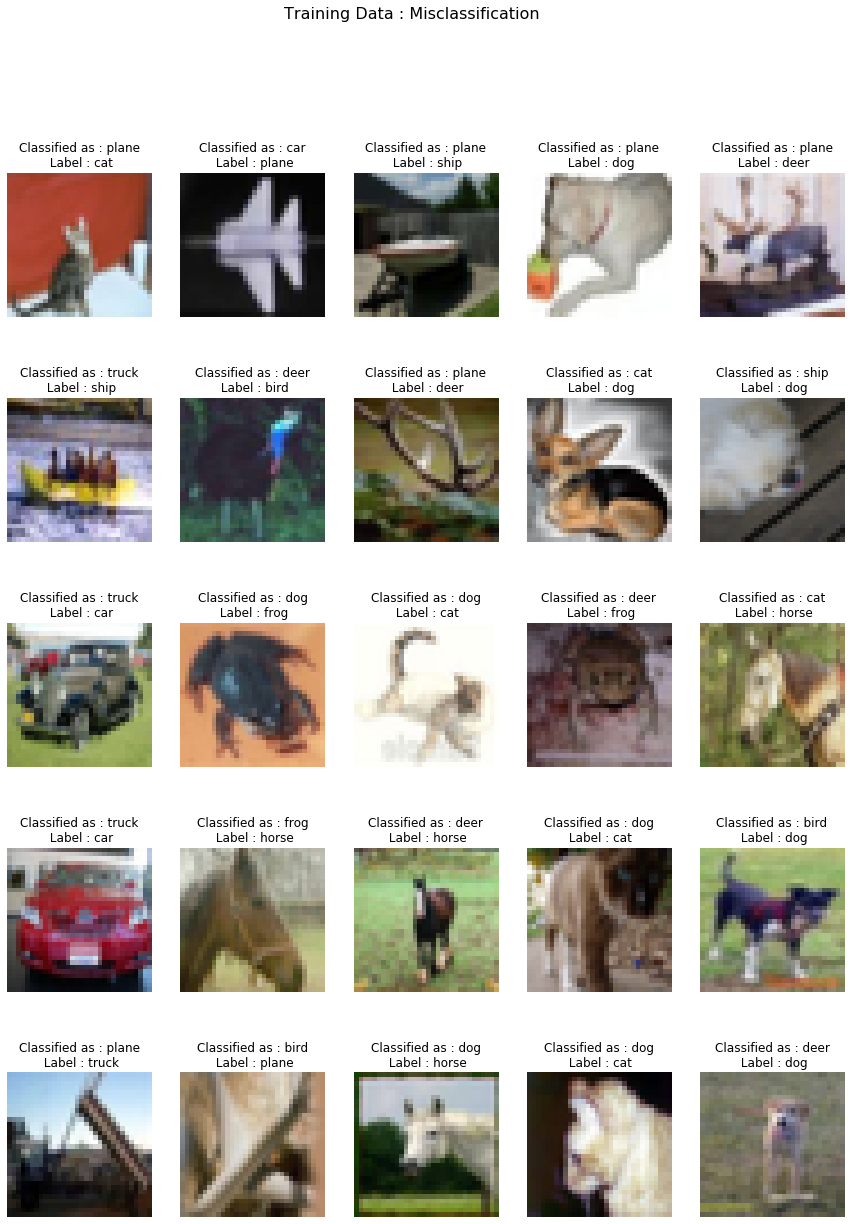

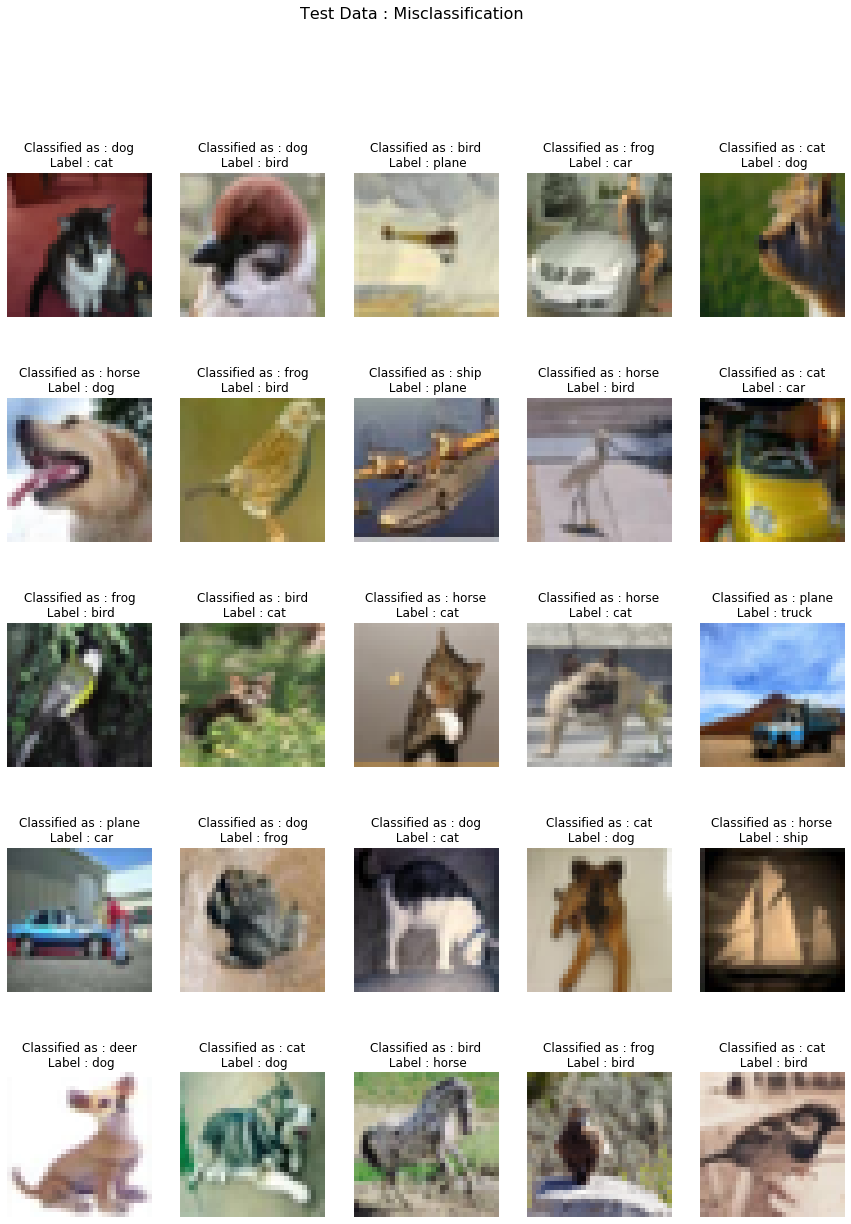

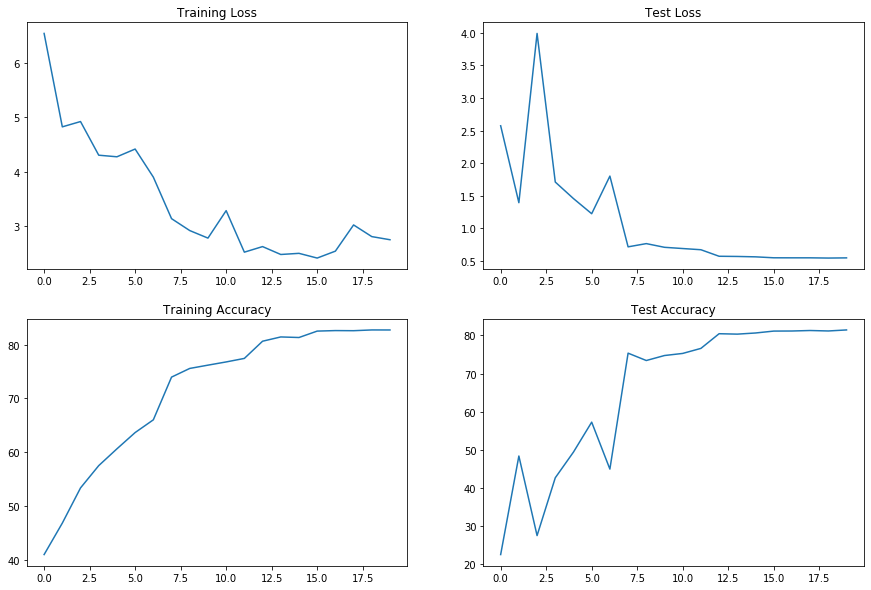

In [24]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = deep_cnn.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L1 = []
train_acc_L1 = []
test_losses_L1 = []
test_acc_L1 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'L1', True, EPOCHS-1)
    train_losses_L1.append(tr_losses)
    train_acc_L1.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'L1',True, EPOCHS-1)
    test_losses_L1.append(ts_loss)
    test_acc_L1.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L1)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L1)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L1)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L1)
axs[1, 1].set_title("Test Accuracy")

## 6.3 Model with - L2 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/S8/customDeepCNN.py:61: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=2.4709036350250244 Batch_id=0 Accuracy=4.69:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/S8/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=0.8563169240951538 Batch_id=781 Accuracy=53.45: 100%|██████████| 782/782 [00:33<00:00, 23.61it/s]
/content/drive/My Drive/Colab Notebooks/S8/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad


Test set: Average loss: 0.9836, Accuracy: 6501/10000 (65.01%)

EPOCH: 1


Loss=0.6543505787849426 Batch_id=781 Accuracy=73.14: 100%|██████████| 782/782 [00:33<00:00, 23.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7027, Accuracy: 7585/10000 (75.85%)

EPOCH: 2


Loss=1.1018967628479004 Batch_id=781 Accuracy=79.44: 100%|██████████| 782/782 [00:33<00:00, 23.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7505, Accuracy: 7532/10000 (75.32%)

EPOCH: 3


Loss=0.2669246196746826 Batch_id=781 Accuracy=82.91: 100%|██████████| 782/782 [00:32<00:00, 23.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6385, Accuracy: 7869/10000 (78.69%)

EPOCH: 4


Loss=0.455353319644928 Batch_id=781 Accuracy=85.37: 100%|██████████| 782/782 [00:33<00:00, 23.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6268, Accuracy: 7983/10000 (79.83%)

EPOCH: 5


Loss=0.5748245716094971 Batch_id=781 Accuracy=86.88: 100%|██████████| 782/782 [00:32<00:00, 23.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6519, Accuracy: 7893/10000 (78.93%)

EPOCH: 6


Loss=0.48061177134513855 Batch_id=781 Accuracy=88.89: 100%|██████████| 782/782 [00:33<00:00, 23.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5166, Accuracy: 8285/10000 (82.85%)

EPOCH: 7


Loss=0.11102364957332611 Batch_id=781 Accuracy=93.98: 100%|██████████| 782/782 [00:33<00:00, 23.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3552, Accuracy: 8788/10000 (87.88%)

EPOCH: 8


Loss=0.13064062595367432 Batch_id=781 Accuracy=95.77: 100%|██████████| 782/782 [00:32<00:00, 23.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3433, Accuracy: 8835/10000 (88.35%)

EPOCH: 9


Loss=0.0530545711517334 Batch_id=781 Accuracy=96.61: 100%|██████████| 782/782 [00:32<00:00, 23.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3496, Accuracy: 8848/10000 (88.48%)

EPOCH: 10


Loss=0.0334760844707489 Batch_id=781 Accuracy=97.34: 100%|██████████| 782/782 [00:33<00:00, 23.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3512, Accuracy: 8829/10000 (88.29%)

EPOCH: 11


Loss=0.4277036786079407 Batch_id=781 Accuracy=97.89: 100%|██████████| 782/782 [00:32<00:00, 23.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3516, Accuracy: 8854/10000 (88.54%)

EPOCH: 12


Loss=0.07427218556404114 Batch_id=781 Accuracy=98.57: 100%|██████████| 782/782 [00:32<00:00, 23.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3482, Accuracy: 8856/10000 (88.56%)

EPOCH: 13


Loss=0.09088870882987976 Batch_id=781 Accuracy=98.66: 100%|██████████| 782/782 [00:32<00:00, 23.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3485, Accuracy: 8868/10000 (88.68%)

EPOCH: 14


Loss=0.22350618243217468 Batch_id=781 Accuracy=98.74: 100%|██████████| 782/782 [00:32<00:00, 23.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3488, Accuracy: 8874/10000 (88.74%)

EPOCH: 15


Loss=0.1209043562412262 Batch_id=781 Accuracy=98.73: 100%|██████████| 782/782 [00:32<00:00, 23.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3491, Accuracy: 8866/10000 (88.66%)

EPOCH: 16


Loss=0.4669734239578247 Batch_id=781 Accuracy=98.78: 100%|██████████| 782/782 [00:32<00:00, 23.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3516, Accuracy: 8870/10000 (88.70%)

EPOCH: 17


Loss=0.08581292629241943 Batch_id=781 Accuracy=98.78: 100%|██████████| 782/782 [00:32<00:00, 23.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3500, Accuracy: 8859/10000 (88.59%)

EPOCH: 18


Loss=0.02138611674308777 Batch_id=781 Accuracy=98.85: 100%|██████████| 782/782 [00:32<00:00, 23.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3513, Accuracy: 8863/10000 (88.63%)

EPOCH: 19


Loss=0.03959530591964722 Batch_id=781 Accuracy=98.80: 100%|██████████| 782/782 [00:33<00:00, 23.54it/s]



Test set: Average loss: 0.3489, Accuracy: 8858/10000 (88.58%)



Text(0.5, 1.0, 'Test Accuracy')

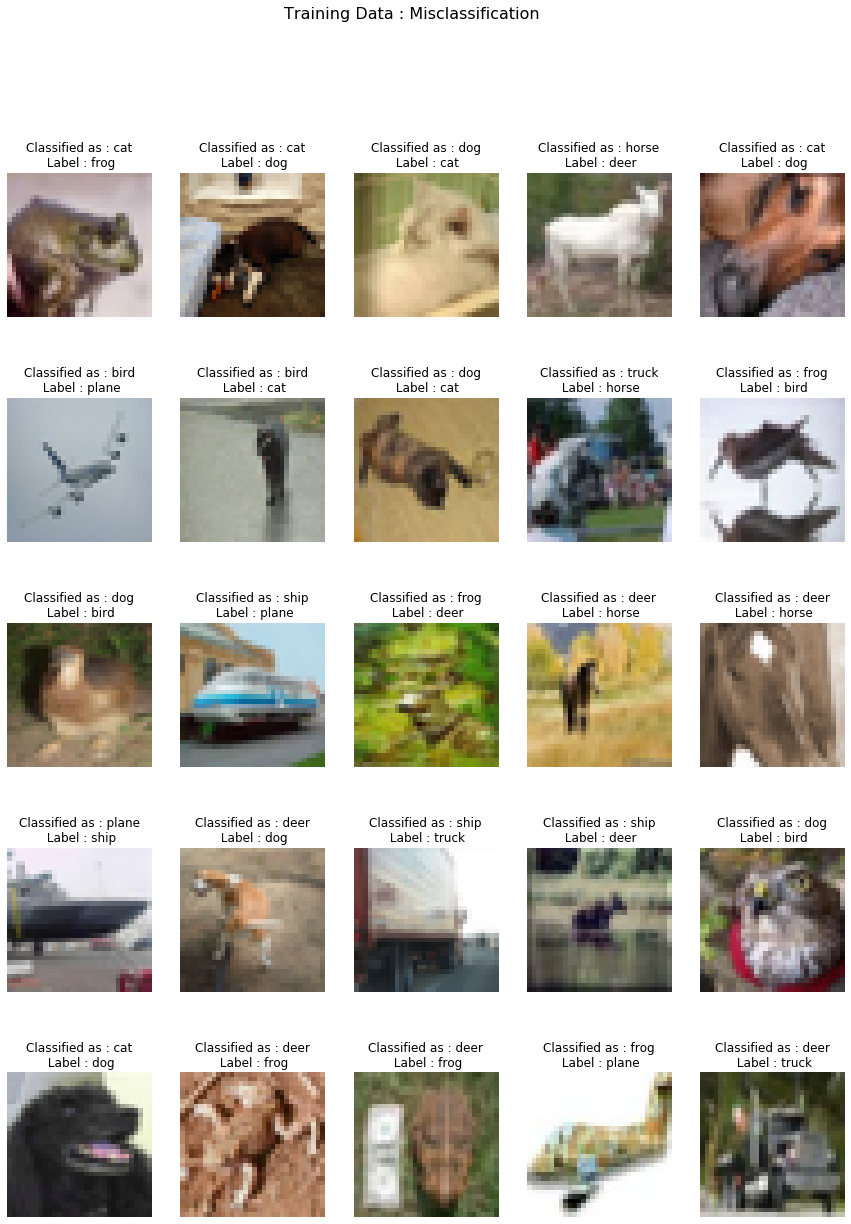

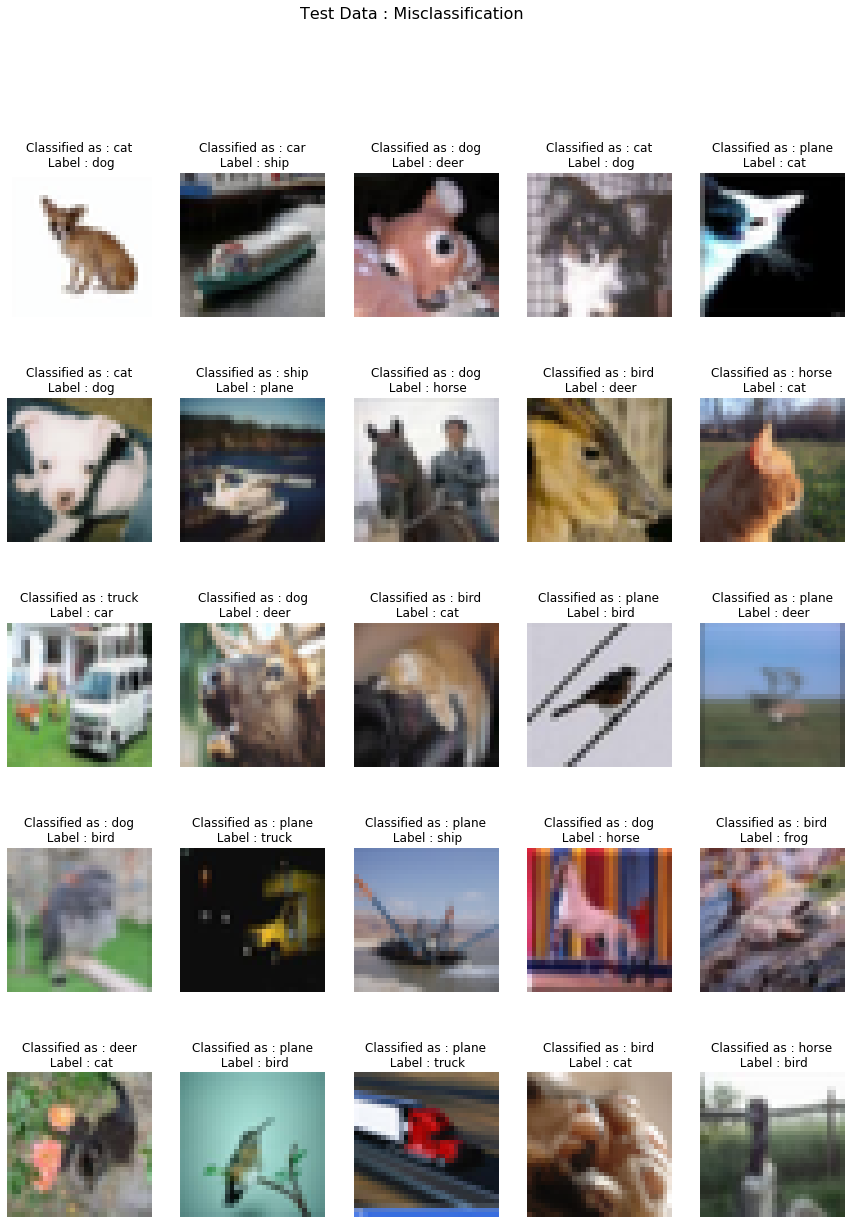

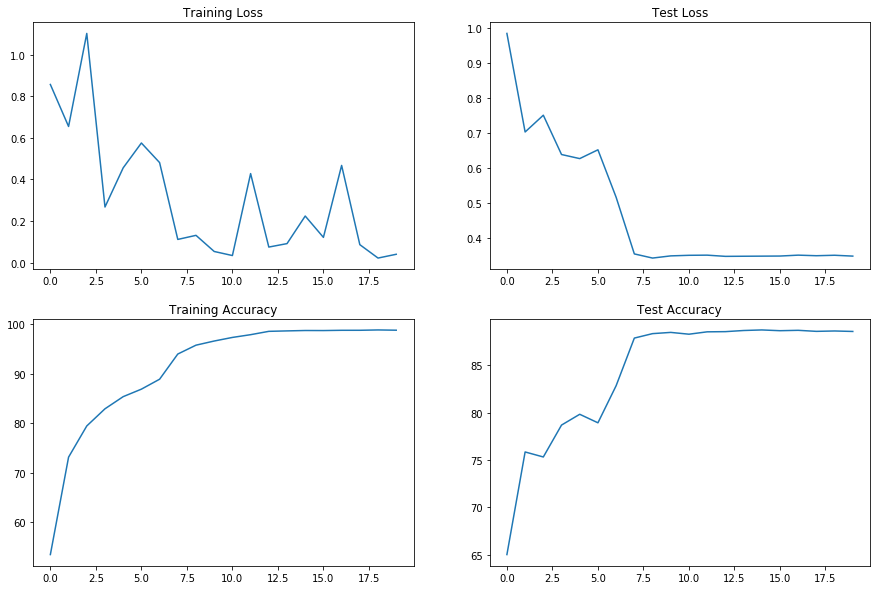

In [25]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = deep_cnn.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.001)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L2 = []
train_acc_L2 = []
test_losses_L2 = []
test_acc_L2 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'L2', True, EPOCHS-1)
    train_losses_L2.append(tr_losses)
    train_acc_L2.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'L2',True, EPOCHS-1)
    test_losses_L2.append(ts_loss)
    test_acc_L2.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L2)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L2)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L2)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L2)
axs[1, 1].set_title("Test Accuracy")

## 6.4 Model with - L1 & L2 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/S8/customDeepCNN.py:61: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=57.14134979248047 Batch_id=0 Accuracy=9.38:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/S8/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=5.493288040161133 Batch_id=781 Accuracy=40.36: 100%|██████████| 782/782 [00:35<00:00, 21.79it/s]
/content/drive/My Drive/Colab Notebooks/S8/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(


Test set: Average loss: 1.9331, Accuracy: 3287/10000 (32.87%)

EPOCH: 1


Loss=5.311898231506348 Batch_id=781 Accuracy=46.59: 100%|██████████| 782/782 [00:35<00:00, 21.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 3.1645, Accuracy: 2743/10000 (27.43%)

EPOCH: 2


Loss=4.519218444824219 Batch_id=781 Accuracy=52.44: 100%|██████████| 782/782 [00:35<00:00, 22.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 2.1170, Accuracy: 3598/10000 (35.98%)

EPOCH: 3


Loss=3.6397671699523926 Batch_id=781 Accuracy=56.42: 100%|██████████| 782/782 [00:35<00:00, 21.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7017, Accuracy: 4685/10000 (46.85%)

EPOCH: 4


Loss=3.8471598625183105 Batch_id=781 Accuracy=59.47: 100%|██████████| 782/782 [00:35<00:00, 21.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4538, Accuracy: 5215/10000 (52.15%)

EPOCH: 5


Loss=3.0515177249908447 Batch_id=781 Accuracy=62.08: 100%|██████████| 782/782 [00:35<00:00, 22.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6820, Accuracy: 5017/10000 (50.17%)

EPOCH: 6


Loss=3.651963233947754 Batch_id=781 Accuracy=64.74: 100%|██████████| 782/782 [00:35<00:00, 22.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2795, Accuracy: 5669/10000 (56.69%)

EPOCH: 7


Loss=2.0486040115356445 Batch_id=781 Accuracy=73.40: 100%|██████████| 782/782 [00:35<00:00, 22.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7146, Accuracy: 7541/10000 (75.41%)

EPOCH: 8


Loss=2.2846474647521973 Batch_id=781 Accuracy=75.24: 100%|██████████| 782/782 [00:35<00:00, 22.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7074, Accuracy: 7535/10000 (75.35%)

EPOCH: 9


Loss=1.9554455280303955 Batch_id=781 Accuracy=76.04: 100%|██████████| 782/782 [00:35<00:00, 22.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7156, Accuracy: 7479/10000 (74.79%)

EPOCH: 10


Loss=1.761446237564087 Batch_id=781 Accuracy=76.65: 100%|██████████| 782/782 [00:35<00:00, 22.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7548, Accuracy: 7370/10000 (73.70%)

EPOCH: 11


Loss=1.6623883247375488 Batch_id=781 Accuracy=77.25: 100%|██████████| 782/782 [00:35<00:00, 22.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8183, Accuracy: 7170/10000 (71.70%)

EPOCH: 12


Loss=1.673363447189331 Batch_id=781 Accuracy=80.69: 100%|██████████| 782/782 [00:35<00:00, 22.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5684, Accuracy: 8070/10000 (80.70%)

EPOCH: 13


Loss=1.752168893814087 Batch_id=781 Accuracy=81.60: 100%|██████████| 782/782 [00:35<00:00, 22.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5570, Accuracy: 8114/10000 (81.14%)

EPOCH: 14


Loss=1.680830717086792 Batch_id=781 Accuracy=81.88: 100%|██████████| 782/782 [00:35<00:00, 22.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5528, Accuracy: 8120/10000 (81.20%)

EPOCH: 15


Loss=2.0734477043151855 Batch_id=781 Accuracy=82.51: 100%|██████████| 782/782 [00:35<00:00, 22.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5470, Accuracy: 8134/10000 (81.34%)

EPOCH: 16


Loss=1.5421677827835083 Batch_id=781 Accuracy=82.66: 100%|██████████| 782/782 [00:35<00:00, 22.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5449, Accuracy: 8177/10000 (81.77%)

EPOCH: 17


Loss=1.6603667736053467 Batch_id=781 Accuracy=82.64: 100%|██████████| 782/782 [00:35<00:00, 22.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5476, Accuracy: 8149/10000 (81.49%)

EPOCH: 18


Loss=2.2259154319763184 Batch_id=781 Accuracy=82.97: 100%|██████████| 782/782 [00:35<00:00, 22.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5410, Accuracy: 8190/10000 (81.90%)

EPOCH: 19


Loss=1.4307000637054443 Batch_id=781 Accuracy=82.84: 100%|██████████| 782/782 [00:35<00:00, 21.84it/s]



Test set: Average loss: 0.5471, Accuracy: 8157/10000 (81.57%)



Text(0.5, 1.0, 'Test Accuracy')

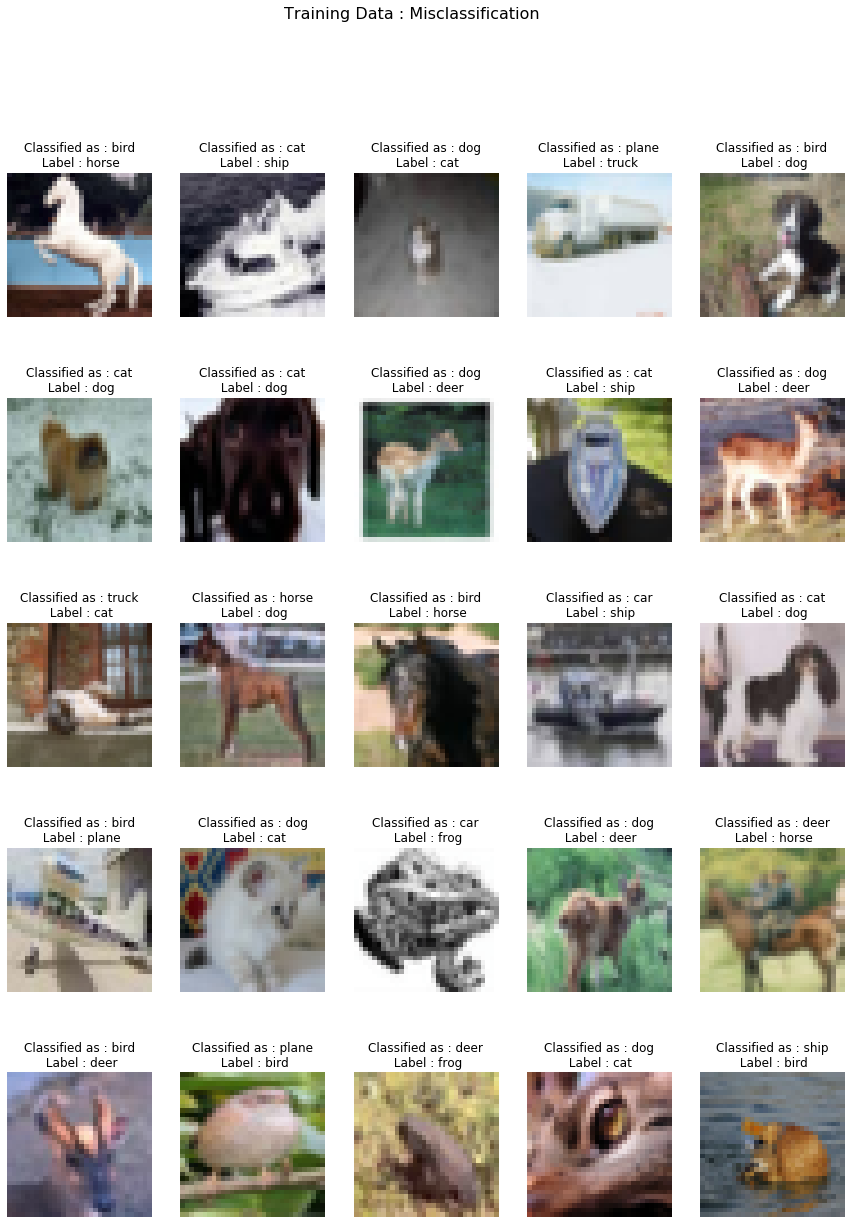

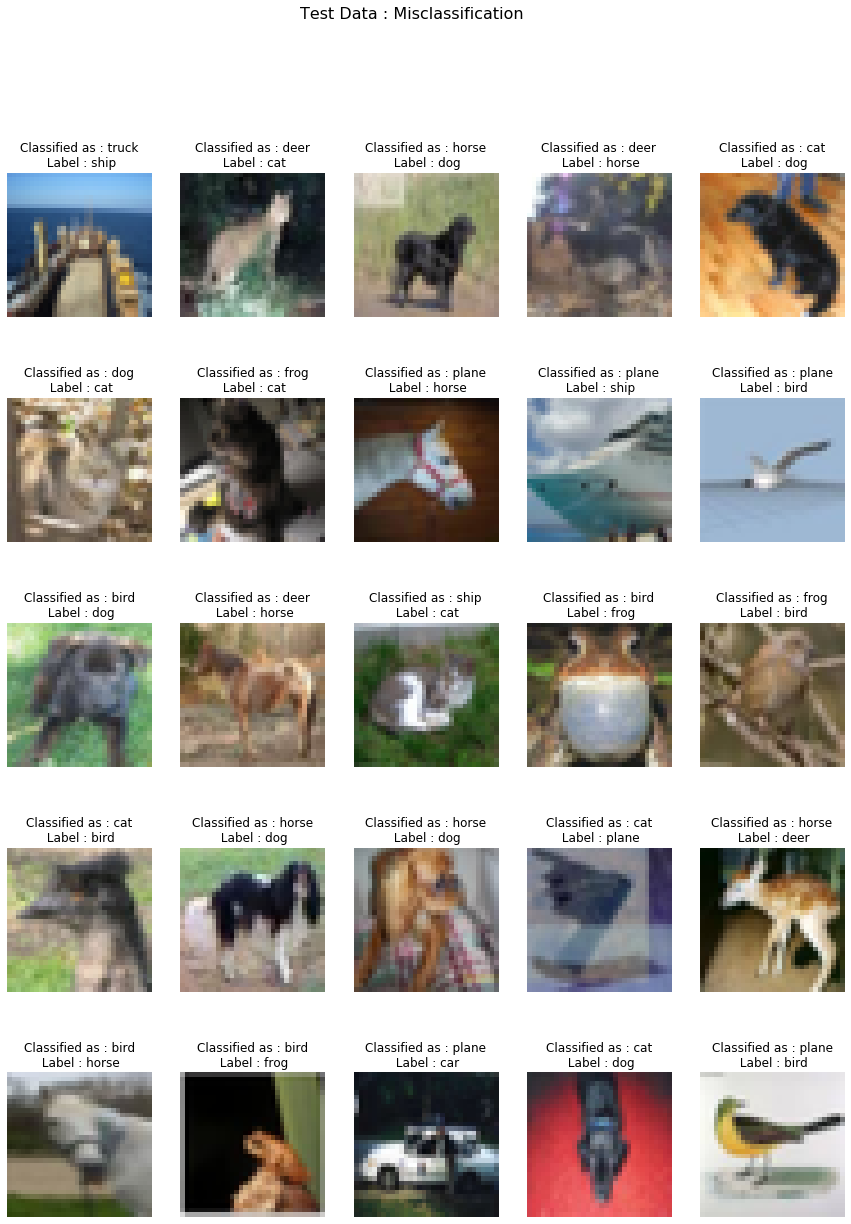

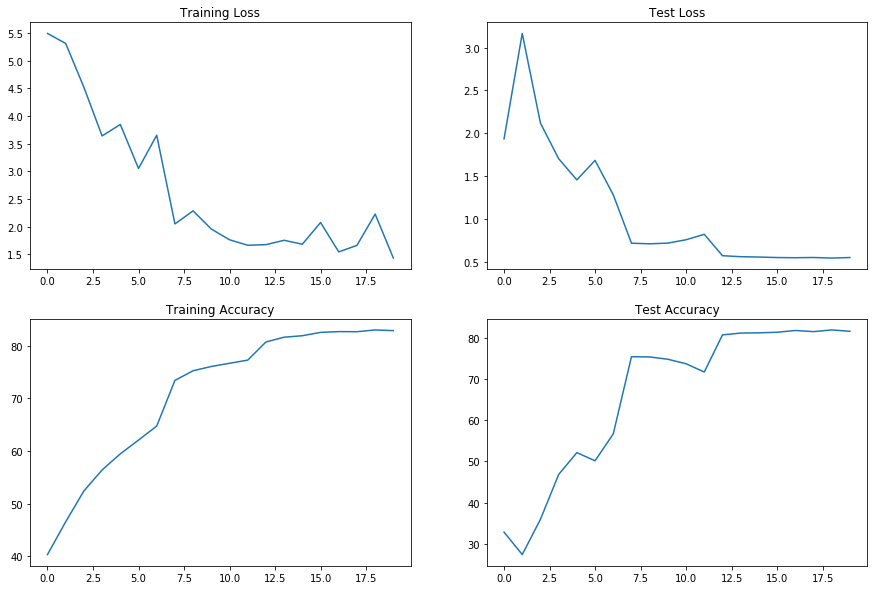

In [26]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = deep_cnn.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.001)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L1_L2 = []
train_acc_L1_L2 = []
test_losses_L1_L2 = []
test_acc_L1_L2 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'ElastiNet', True, EPOCHS-1)
    train_losses_L1_L2.append(tr_losses)
    train_acc_L1_L2.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'ElastiNet',True, EPOCHS-1)
    test_losses_L1_L2.append(ts_loss)
    test_acc_L1_L2.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L1_L2)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L1_L2)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L1_L2)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L1_L2)
axs[1, 1].set_title("Test Accuracy")

# 7. Display ReceptiveField calculations

In [27]:
# https://gist.github.com/Nikasa1889/781a8eb20c5b32f8e378353cde4daa51#file-computereceptivefield-py
import math
import sys
# final_model - high RF
convnet =   [[3,1,0],[3,1,4],[1,1,4],[2,2,0],[1,1,0],[5,1,2],[5,1,2],[5,1,2],[2,2,0],
             [1,1,0], [5, 1, 2],[5,1,2],[9,9,0],[1,1,0]]
layer_names = ['conv1','conv2','conv3','MP1','conv4','conv5','conv6','conv7','MP2', 
               'conv8','conv9','conv10','GAP','conv11']
# other_model - low RF
# convnet =   [[3,1,0],[3,1,4],[1,1,4],[2,2,0],[1,1,0],[5,1,2],[5,1,2],[5,1,2],#[2,2,0],
#              [1,1,0], [3, 1, 0],[3,1,0],[7,7,0],[1,1,0]]
# layer_names = ['conv1','conv2','conv3','MP1','conv4','conv5','conv6','conv7',#'MP2', 
#                'conv8','conv9','conv10','GAP','conv11']               
imsize = 32

def outFromIn(conv, layerIn):
  n_in = layerIn[0]
  j_in = layerIn[1]
  r_in = layerIn[2]
  start_in = layerIn[3]
  k = conv[0]
  s = conv[1]
  p = conv[2]
  
  n_out = math.floor((n_in - k + 2*p)/s) + 1
  actualP = (n_out-1)*s - n_in + k 
  pR = math.ceil(actualP/2)
  pL = math.floor(actualP/2)
  
  j_out = j_in * s
  r_out = r_in + (k - 1)*j_in
  start_out = start_in + ((k-1)/2 - pL)*j_in
  return n_out, j_out, r_out, start_out
  
def printLayer(layer, layer_name):
  print(layer_name + ":")
  print("\t n features: %s \n \t jump: %s \n \t receptive size: %s \n \t start: %s " % (layer[0], layer[1], layer[2], layer[3]))
 
layerInfos = []
if __name__ == '__main__':
#first layer is the data layer (image) with n_0 = image size; j_0 = 1; r_0 = 1; and start_0 = 0.5
  print ("-------Net summary------")
  currentLayer = [imsize, 1, 1, 0.5]
  printLayer(currentLayer, "input image")
  for i in range(len(convnet)):
    currentLayer = outFromIn(convnet[i], currentLayer)
    layerInfos.append(currentLayer)
    printLayer(currentLayer, layer_names[i])
  print ("------------------------")
  # layer_name = input ("Layer name where the feature in: ")
  # layer_idx = layer_names.index(layer_name)
  # idx_x = int(input("index of the feature in x dimension (from 0)"))
  # idx_y = int(input("index of the feature in y dimension (from 0)"))
  
  # n = layerInfos[layer_idx][0]
  # j = layerInfos[layer_idx][1]
  # r = layerInfos[layer_idx][2]
  # start = layerInfos[layer_idx][3]
  # assert(idx_x < n)
  # assert(idx_y < n)
  
  # print ("receptive field: (%s, %s)" % (r, r))
  # print ("center: (%s, %s)" % (start+idx_x*j, start+idx_y*j))

-------Net summary------
input image:
	 n features: 32 
 	 jump: 1 
 	 receptive size: 1 
 	 start: 0.5 
conv1:
	 n features: 30 
 	 jump: 1 
 	 receptive size: 3 
 	 start: 1.5 
conv2:
	 n features: 36 
 	 jump: 1 
 	 receptive size: 5 
 	 start: -1.5 
conv3:
	 n features: 44 
 	 jump: 1 
 	 receptive size: 5 
 	 start: -5.5 
MP1:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 6 
 	 start: -5.0 
conv4:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 6 
 	 start: -5.0 
conv5:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 14 
 	 start: -5.0 
conv6:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 22 
 	 start: -5.0 
conv7:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 30 
 	 start: -5.0 
MP2:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 32 
 	 start: -4.0 
conv8:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 32 
 	 start: -4.0 
conv9:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 48 
 	 start: -4.0 
conv10:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 64 
 	 start

# 8. Plot the graphs for comparison

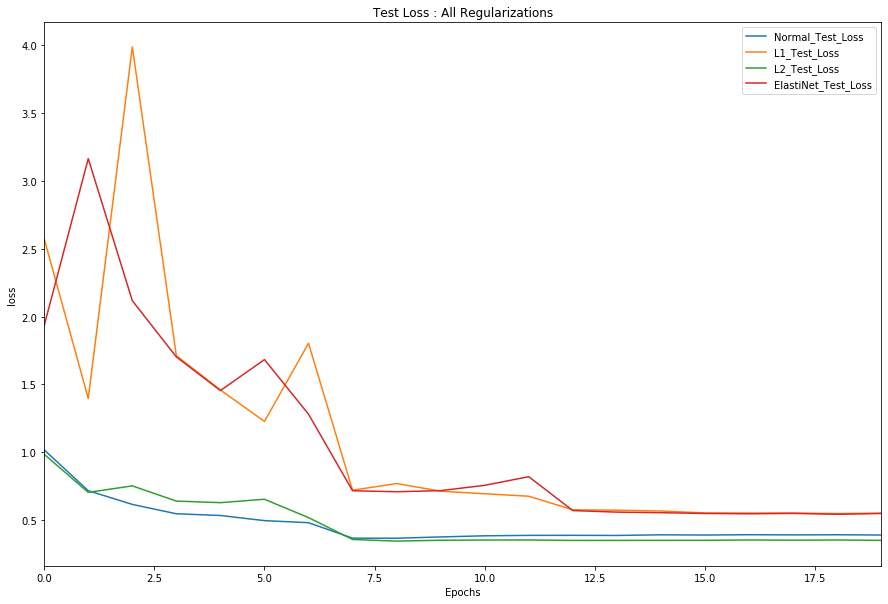

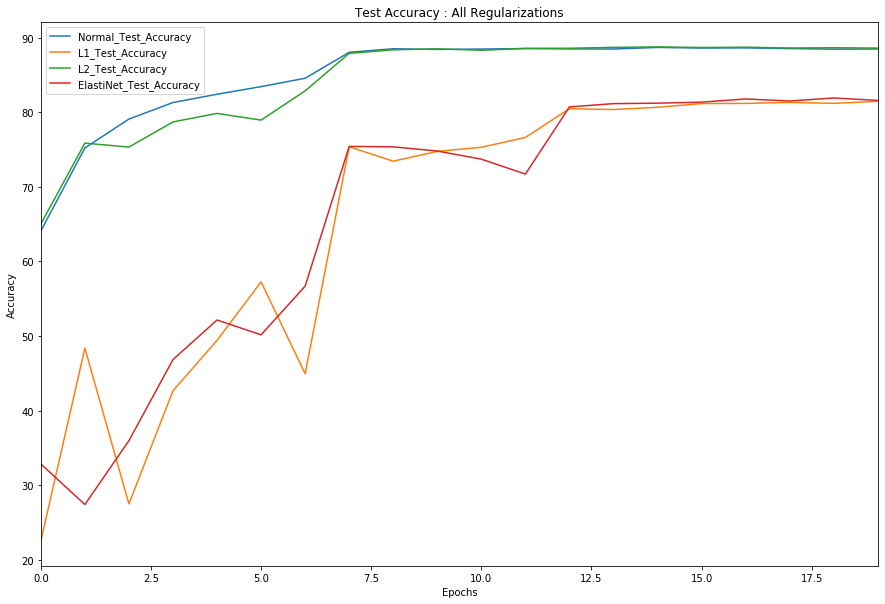

In [28]:
import pandas as pd
Testing_all_loss = pd.DataFrame({'Normal_Test_Loss' : np.array(test_losses).reshape(-1),
                                 'L1_Test_Loss' : np.array(test_losses_L1).reshape(-1),
                                 'L2_Test_Loss' : np.array(test_losses_L2).reshape(-1),
                                 'ElastiNet_Test_Loss' : np.array(test_losses_L1_L2).reshape(-1)
                                 })

Testing_all_accuracy = pd.DataFrame({'Normal_Test_Accuracy' : np.array(test_acc).reshape(-1),
                                     'L1_Test_Accuracy' : np.array(test_acc_L1).reshape(-1),
                                     'L2_Test_Accuracy' : np.array(test_acc_L2).reshape(-1),
                                     'ElastiNet_Test_Accuracy' : np.array(test_acc_L1_L2).reshape(-1)
                                     })

fig1 = Testing_all_loss.plot(figsize=(15,10),kind = 'line', title = "Test Loss : All Regularizations")
fig1.set_xlabel("Epochs")
fig1.set_ylabel("loss")
fig2 = Testing_all_accuracy.plot(figsize=(15,10),kind = 'line',title = "Test Accuracy : All Regularizations")
fig2.set_xlabel("Epochs")
fig2.set_ylabel("Accuracy")

fig1
fig2